---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 4

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

---

## Part 1 - Random Graph Identification

For the first part of this assignment you will analyze randomly generated graphs and determine which algorithm created them.

In [3]:
P1_Graphs = pickle.load(open('A4_graphs','rb'))

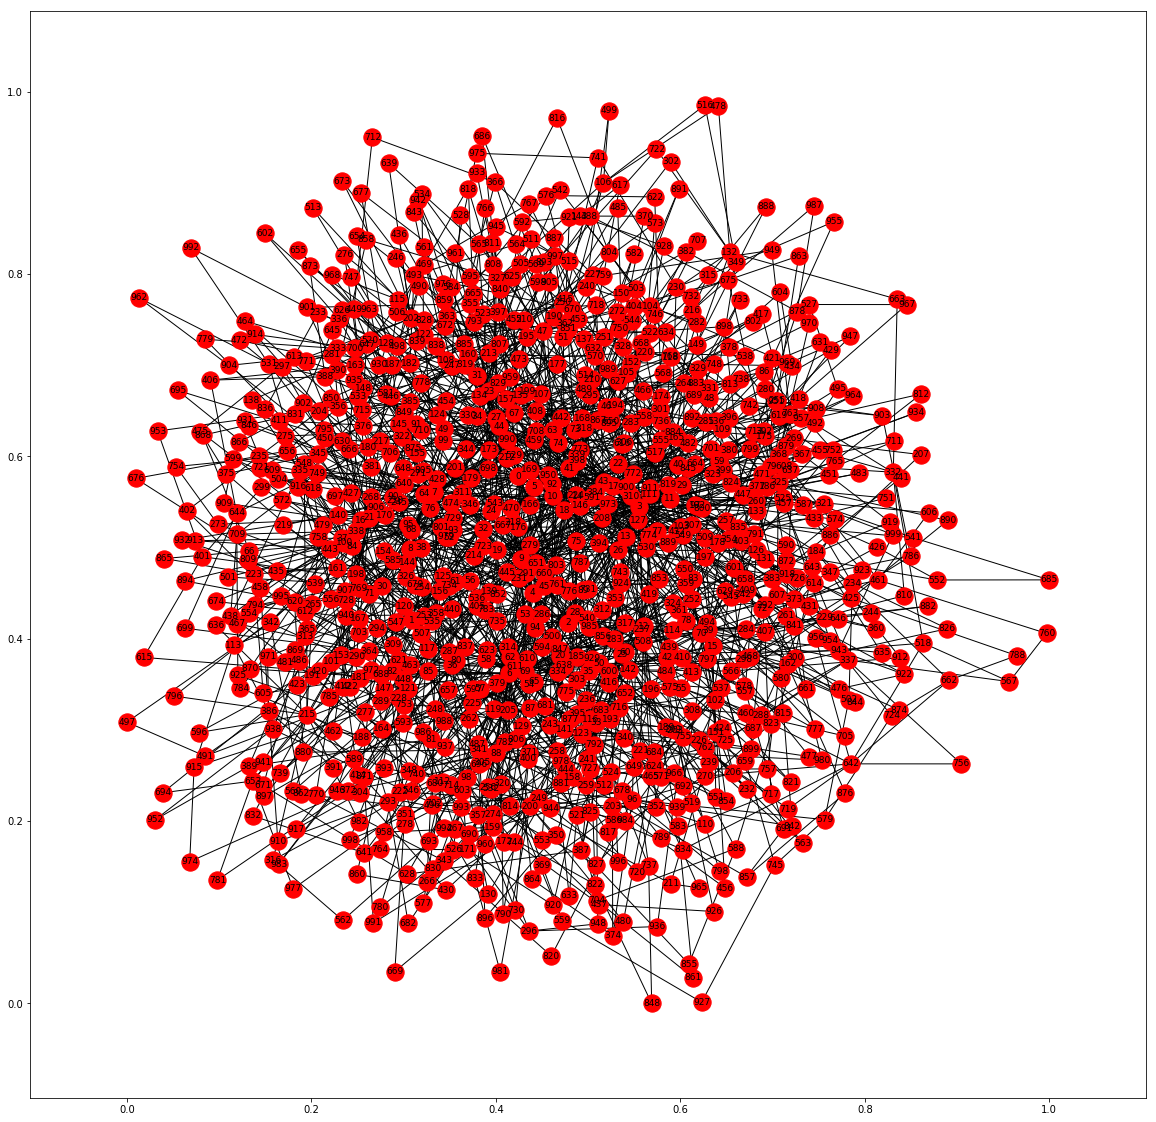

In [16]:

plt.figure(figsize=(20, 20))
nx.draw_networkx(P1_Graphs[0], font_size = 9)
plt.show()

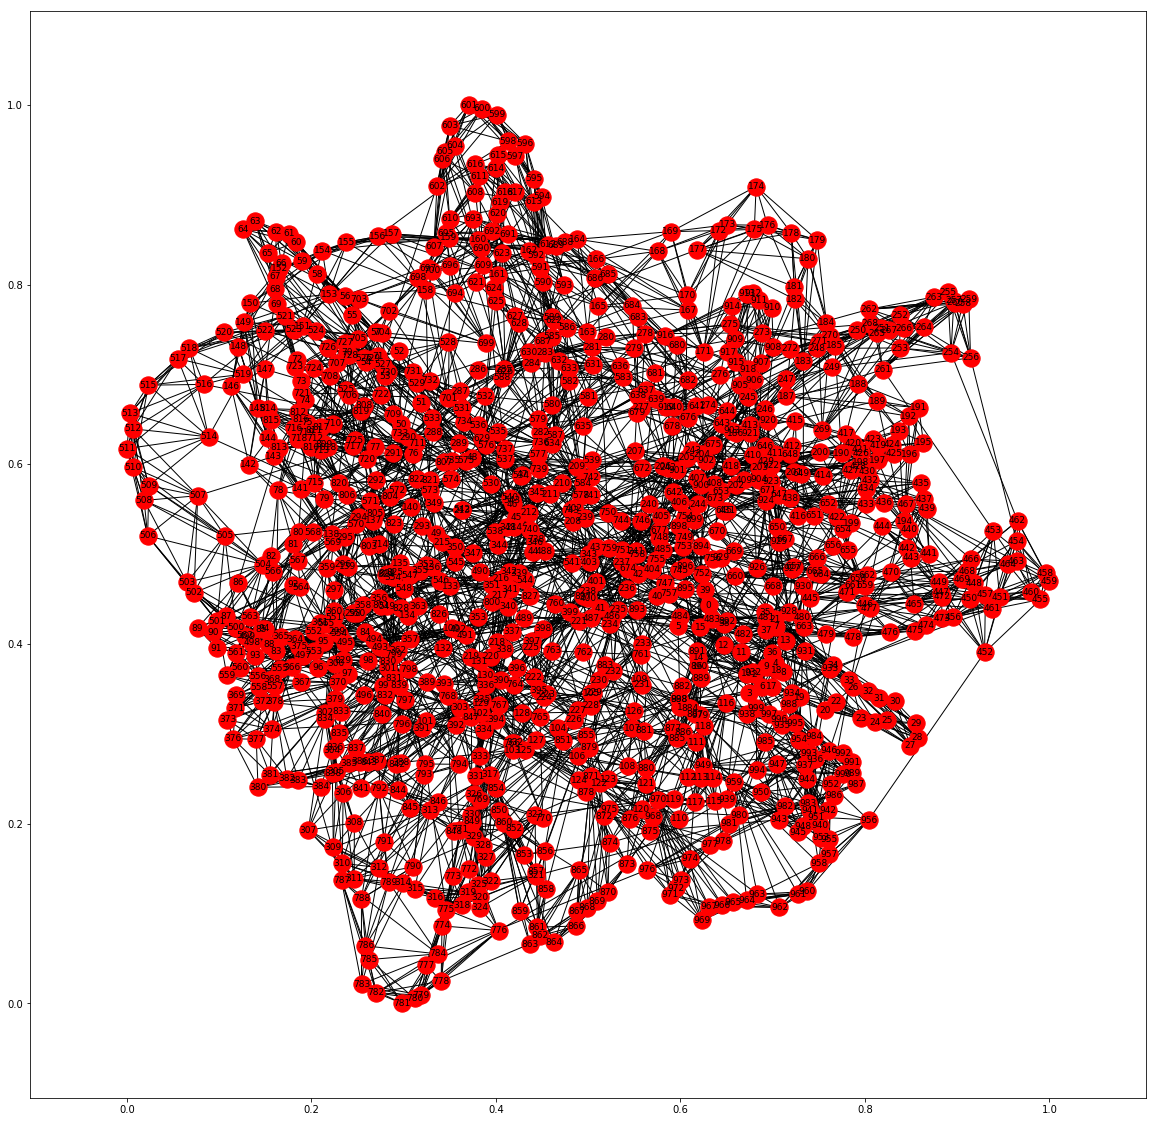

In [17]:
plt.figure(figsize=(20, 20))
nx.draw_networkx(P1_Graphs[1], font_size = 9)
plt.show()

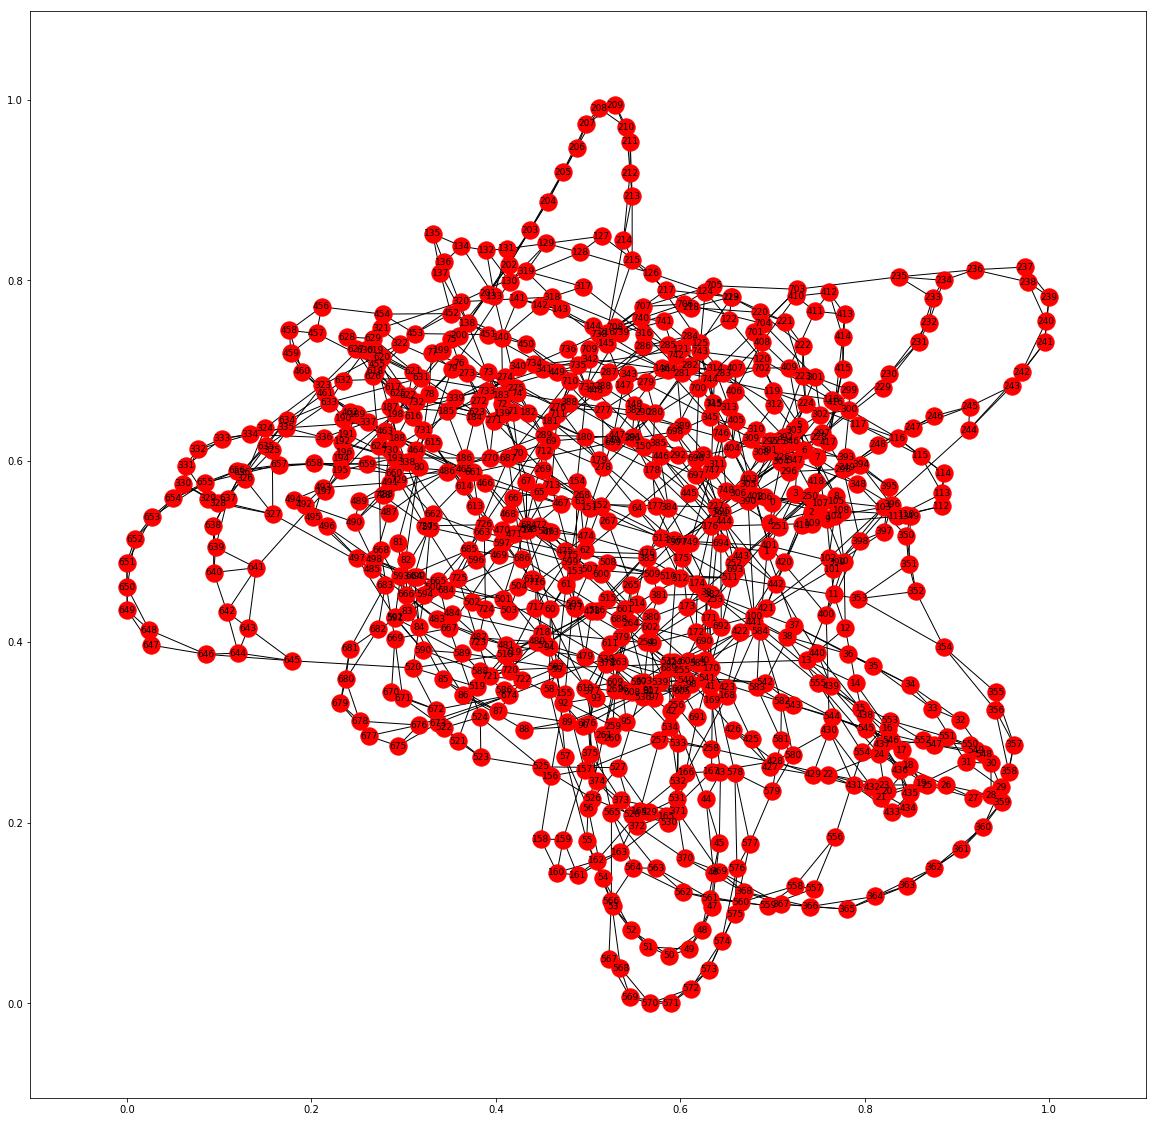

In [18]:
plt.figure(figsize=(20, 20))
nx.draw_networkx(P1_Graphs[2], font_size = 9)
plt.show()

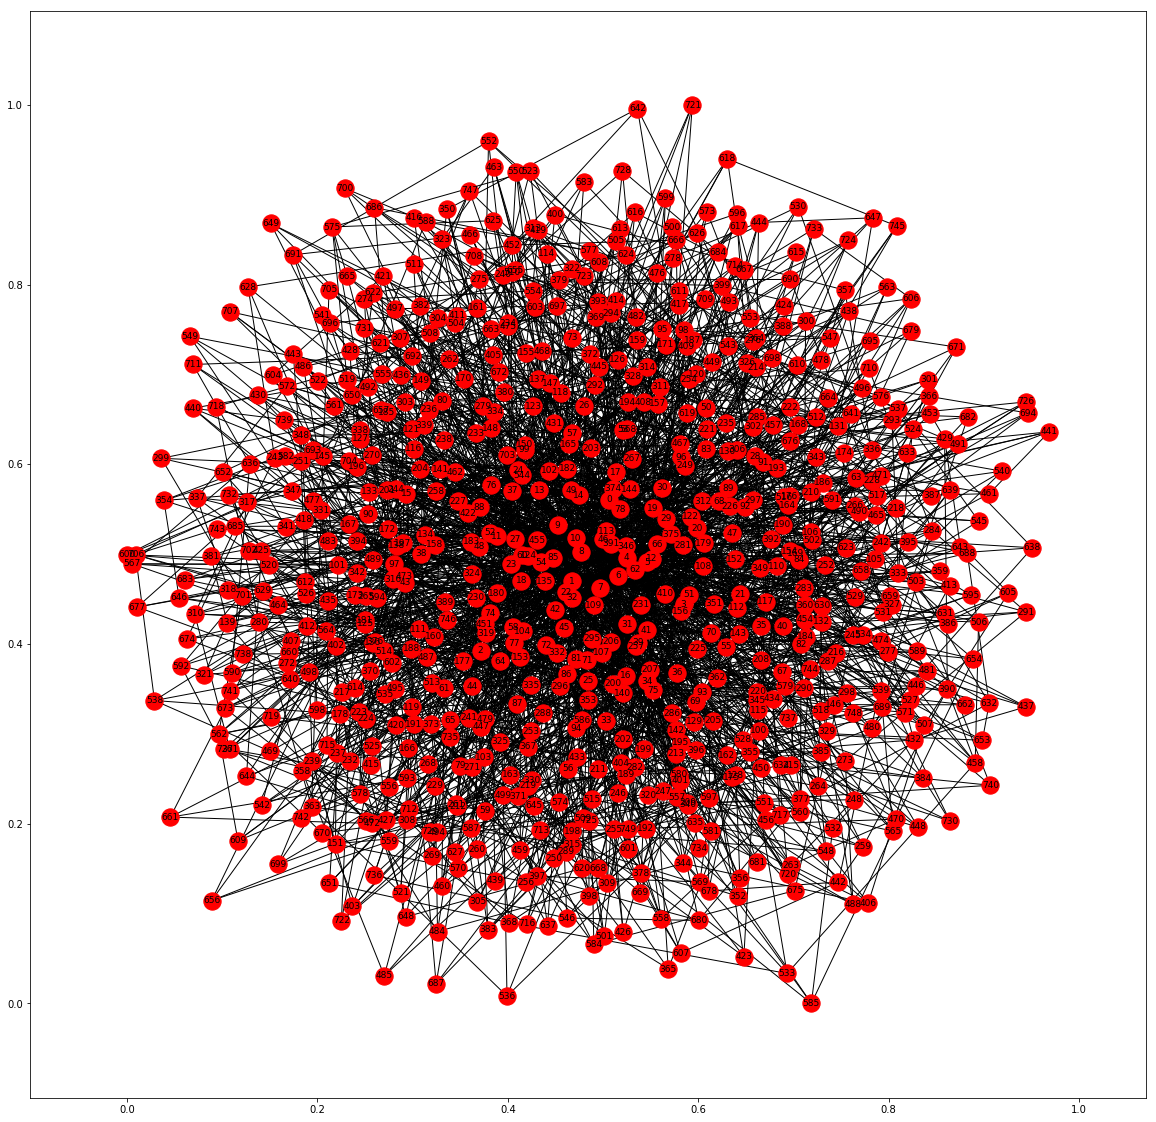

In [19]:
plt.figure(figsize=(20, 20))
nx.draw_networkx(P1_Graphs[3], font_size = 9)
plt.show()

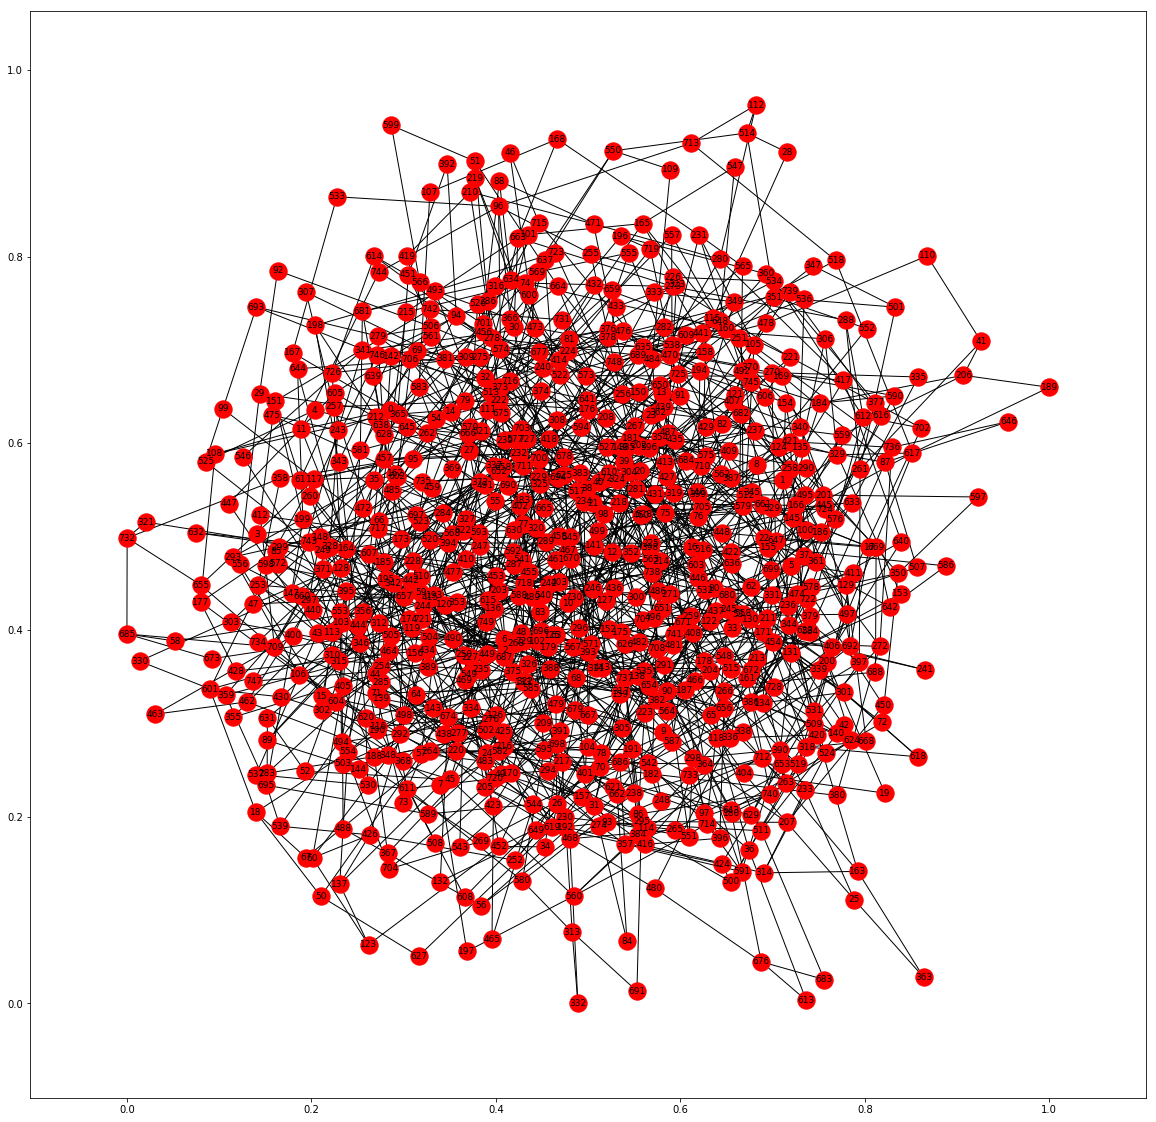

In [20]:
plt.figure(figsize=(20, 20))
nx.draw_networkx(P1_Graphs[4], font_size = 9)
plt.show()

In [4]:
i = 1
for G in P1_Graphs:
    df = pd.DataFrame(index=G.nodes())
    df['clustering'] = pd.Series(nx.clustering(G))
    df['degree'] = pd.Series(G.degree())
    print(f"Graph {i}:")
    print("Average Clustering: "+ str(nx.average_clustering(G)))
    print("Average Shortest Path Length: "+ str(nx.average_shortest_path_length(G)))
    print(df.head(10))
    print(df.describe())
    print()
    i = i + 1

Graph 1:
Average Clustering: 0.03167539146454044
Average Shortest Path Length: 4.099161161161161
   clustering  degree
0    0.018893      39
1    0.000000       2
2    0.027778       9
3    0.007879     100
4    0.034483      30
5    0.010526      20
6    0.007653      49
7    0.008097      39
8    0.019608      18
9    0.008535      38
        clustering       degree
count  1000.000000  1000.000000
mean      0.031675     3.992000
std       0.148209     5.168041
min       0.000000     2.000000
25%       0.000000     2.000000
50%       0.000000     3.000000
75%       0.000000     4.000000
max       1.000000   100.000000

Graph 2:
Average Clustering: 0.5642419635919628
Average Shortest Path Length: 5.089871871871872
   clustering  degree
0    0.488889      10
1    0.400000      11
2    0.638889       9
3    0.611111       9
4    0.638889       9
5    0.490909      11
6    0.622222      10
7    0.533333      10
8    0.644444      10
9    0.622222      10
        clustering       degree
co

In [5]:

for G in P1_Graphs:
    df = pd.DataFrame(index=G.edges())
    df['preferential attachment'] = [i[2] for i in nx.preferential_attachment(G, df.index)]
    df['Common Neighbors'] = df.index.map(lambda city: len(list(nx.common_neighbors(G, city[0], city[1]))))
    print("Graph:")
    print(df.head(10))
    print(df.describe())
    print()
    

Graph:
         preferential attachment  Common Neighbors
(0, 2)                       351                 1
(0, 3)                      3900                 7
(0, 4)                      1170                 4
(0, 5)                       780                 1
(0, 8)                       702                 1
(0, 9)                      1482                 3
(0, 13)                     1014                 0
(0, 23)                     1053                 2
(0, 27)                     1170                 0
(0, 28)                      741                 1
       preferential attachment  Common Neighbors
count              1996.000000       1996.000000
mean                 93.011022          0.120240
std                 261.880360          0.438237
min                   6.000000          0.000000
25%                  12.000000          0.000000
50%                  26.000000          0.000000
75%                  72.000000          0.000000
max                3900.000000          

<br>
`P1_Graphs` is a list containing 5 networkx graphs. Each of these graphs were generated by one of three possible algorithms:
* Preferential Attachment (`'PA'`)
* Small World with low probability of rewiring (`'SW_L'`)
* Small World with high probability of rewiring (`'SW_H'`)

Anaylze each of the 5 graphs and determine which of the three algorithms generated the graph.

*The `graph_identification` function should return a list of length 5 where each element in the list is either `'PA'`, `'SW_L'`, or `'SW_H'`.*

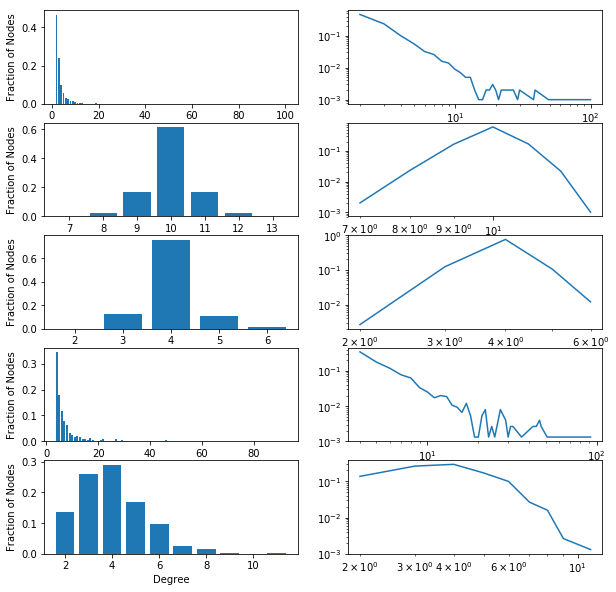

In [22]:
fig, axs = plt.subplots(5, 2)
fig.set_figwidth(10)
fig.set_figheight(10)
i = 0
for G in P1_Graphs:
    degrees = G.degree()
    degree_values = sorted(set(degrees.values()))
    histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]
    axs[i,0].bar(degree_values, histogram)
    axs[i,1].plot(degree_values, histogram)
    axs[i,1].set_xscale('log')
    axs[i,1].set_yscale('log')
    axs[i,0].set_xlabel('Degree')
    axs[i,0].set_ylabel('Fraction of Nodes')
    i = i +1


plt.show()



In [7]:
def graph_identification():
    return ['PA', 'SW_L', 'SW_L', 'PA', 'SW_H']

graph_identification()

['PA', 'SW_L', 'SW_L', 'PA', 'SW_H']

---

## Part 2 - Company Emails

For the second part of this assignment you will be working with a company's email network where each node corresponds to a person at the company, and each edge indicates that at least one email has been sent between two people.

The network also contains the node attributes `Department` and `ManagementSalary`.

`Department` indicates the department in the company which the person belongs to, and `ManagementSalary` indicates whether that person is receiving a management position salary.

In [2]:
G = nx.read_gpickle('email_prediction.txt')

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1005
Number of edges: 16706
Average degree:  33.2458


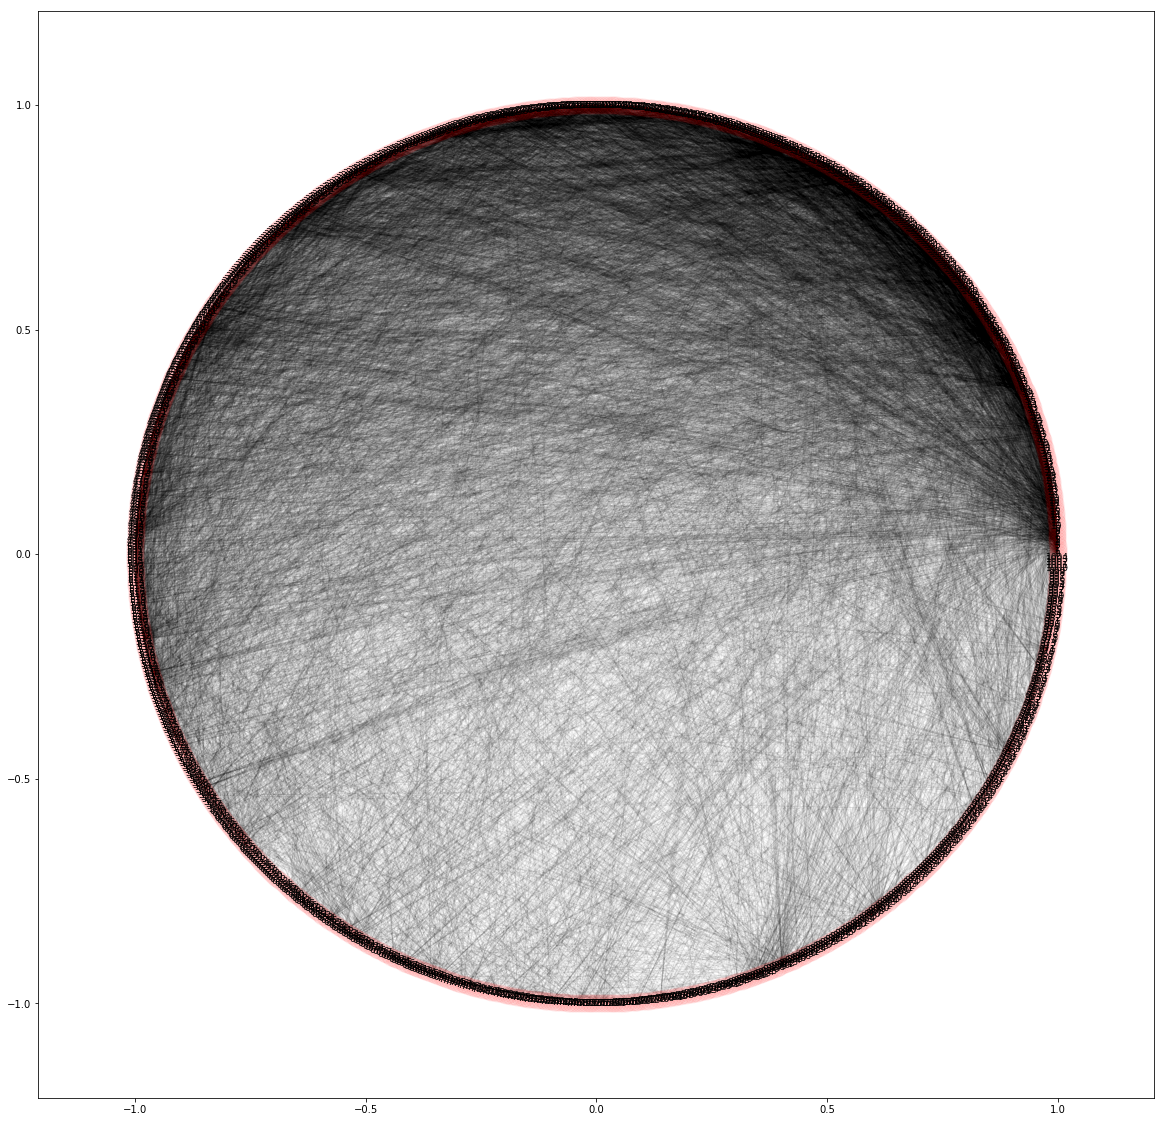

In [9]:
plt.figure(figsize=(20, 20))
nx.draw_networkx(G, alpha=0.05, pos=nx.circular_layout(G), font_size = 9)
plt.show()

In [3]:
df = pd.DataFrame(index=G.edges())
df['preferential attachment'] = [i[2] for i in nx.preferential_attachment(G, df.index)]
df['Common Neighbors'] = df.index.map(lambda city: len(list(nx.common_neighbors(G, city[0], city[1]))))
print("Emails Graph (Edges):")
print(df.head(10))
print(df.describe())
print()

Emails Graph (Edges):
          preferential attachment  Common Neighbors
(0, 1)                       2288                14
(0, 17)                      4884                21
(0, 316)                     2068                17
(0, 146)                     1320                 9
(0, 581)                     1408                 3
(0, 268)                     1628                13
(0, 221)                     2684                20
(0, 218)                     2992                22
(0, 18)                      2464                13
(0, 734)                      616                 2
       preferential attachment  Common Neighbors
count             16706.000000      16706.000000
mean               5655.921525         20.567820
std                6495.644821         18.092343
min                   4.000000          0.000000
25%                1440.000000          9.000000
50%                3404.000000         17.000000
75%                7560.000000         27.000000
max           

### Part 2A - Salary Prediction

Using network `G`, identify the people in the network with missing values for the node attribute `ManagementSalary` and predict whether or not these individuals are receiving a management position salary.

To accomplish this, you will need to create a matrix of node features using networkx, train a sklearn classifier on nodes that have `ManagementSalary` data, and predict a probability of the node receiving a management salary for nodes where `ManagementSalary` is missing.



Your predictions will need to be given as the probability that the corresponding employee is receiving a management position salary.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.88 or higher will receive full points, and with an AUC of 0.82 or higher will pass (get 80% of the full points).

Using your trained classifier, return a series of length 252 with the data being the probability of receiving management salary, and the index being the node id.

    Example:
    
        1       1.0
        2       0.0
        5       0.8
        8       1.0
            ...
        996     0.7
        1000    0.5
        1001    0.0
        Length: 252, dtype: float64

In [3]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import Imputer,\
                                  LabelEncoder,\
                                  MinMaxScaler,\
                                  OneHotEncoder,\
                                  StandardScaler
                
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import auc, roc_auc_score, accuracy_score, classification_report

In [5]:
df = pd.DataFrame(index=G.nodes())
df['Department'] = pd.Series(nx.get_node_attributes(G, 'Department'))
df['ManagementSalary'] = pd.Series(nx.get_node_attributes(G, 'ManagementSalary'))
df['clustering'] = pd.Series(nx.clustering(G))
df['degree'] = pd.Series(G.degree())
print("Emails Graph:")
print(df.head(10))
print(df.describe())

Emails Graph:
   Department  ManagementSalary  clustering  degree
0           1               0.0    0.276423      44
1           1               NaN    0.265306      52
2          21               NaN    0.297803      95
3          21               1.0    0.384910      71
4          21               1.0    0.318691      96
5          25               NaN    0.107002     171
6          25               1.0    0.155183     115
7          14               0.0    0.287785      72
8          14               NaN    0.447059      37
9          14               0.0    0.425320      40
        Department  ManagementSalary   clustering       degree
count  1005.000000        753.000000  1005.000000  1005.000000
mean     13.987065          0.158035     0.399355    33.245771
std      10.356534          0.365016     0.251691    37.331458
min       0.000000          0.000000     0.000000     1.000000
25%       5.000000          0.000000     0.264337     7.000000
50%      14.000000          0.000000

In [6]:
df_cat = pd.get_dummies(df['Department'])

In [7]:
scaler = MinMaxScaler()
num_cols = ['clustering','degree']
df_num = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)

In [8]:
df = pd.concat([df_cat,
                df_num,
                df['ManagementSalary'].reset_index().drop('index',axis=1)]
               ,axis=1)

In [9]:
X_test = df[df['ManagementSalary'].isnull()].drop('ManagementSalary', axis=1)
X_train = df[~df['ManagementSalary'].isnull()].reset_index().drop('index',axis=1)
#y_train = X_train['ManagementSalary']
#X_train.drop('ManagementSalary', axis=1, inplace=True)

In [18]:
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state = 42)
for train_index, val_index in split.split(X_train, X_train['ManagementSalary']):
        # selecting training and validation feature data
        X_train2 = X_train.loc[train_index]
        X_val = X_train.loc[val_index]
        
        # selecting training and validation target variable
        y_train = X_train2['ManagementSalary']
        y_val = X_val['ManagementSalary']
    
        # dropping the target from training and validation feature data
        X_train2.drop('ManagementSalary', inplace=True, axis=1)
        X_val.drop('ManagementSalary', inplace=True, axis=1)
        
        # selecting the best classifier for the model
        #clf = AdaBoostClassifier() 
        clf = GradientBoostingClassifier()
        #clf = RandomForestClassifier()
        #print(X_train2)
        # training the model
        clf.fit(X_train2, y_train)
        y_pred = clf.predict_proba(X_val)
        print(classification_report(y_val, clf.predict(X_val)))
        print(roc_auc_score(y_val,clf.predict_proba(X_val)[:,1]))
        y_test=clf.predict_proba(X_test)
        #print(pd.Series(index=X_test.index,data=y_test[:,1]))

             precision    recall  f1-score   support

        0.0       0.94      0.96      0.95       127
        1.0       0.76      0.67      0.71        24

avg / total       0.91      0.91      0.91       151

0.920111548556
1       0.071166
2       0.695963
5       0.981550
8       0.261504
14      0.155306
18      0.133878
27      0.078870
30      0.727379
31      0.475336
34      0.079514
37      0.264533
40      0.078870
45      0.013352
54      0.537341
55      0.431002
60      0.786721
62      0.964670
65      0.459565
77      0.014852
79      0.059401
97      0.031596
101     0.023469
103     0.443207
108     0.066758
113     0.470365
122     0.029935
141     0.086641
142     0.968753
144     0.017496
145     0.548311
          ...   
913     0.013794
914     0.018982
915     0.009193
918     0.051455
923     0.028697
926     0.109224
931     0.012141
934     0.005126
939     0.011726
944     0.010315
945     0.026807
947     0.069509
950     0.074264
951     0.014656
953  

In [19]:
def salary_predictions():
    
    from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
    from sklearn.preprocessing import Imputer,\
                                      LabelEncoder,\
                                      MinMaxScaler,\
                                      OneHotEncoder,\
                                      StandardScaler
                
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
    from sklearn.metrics import auc, roc_auc_score, accuracy_score, classification_report
    df = pd.DataFrame(index=G.nodes())
    df['Department'] = pd.Series(nx.get_node_attributes(G, 'Department'))
    df['ManagementSalary'] = pd.Series(nx.get_node_attributes(G, 'ManagementSalary'))
    df['clustering'] = pd.Series(nx.clustering(G))
    df['degree'] = pd.Series(G.degree())
    df_cat = pd.get_dummies(df['Department'])
    scaler = MinMaxScaler()
    num_cols = ['clustering','degree']
    df_num = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)
    df = pd.concat([df_cat,
                    df_num,
                    df['ManagementSalary'].reset_index().drop('index',axis=1)]
                   ,axis=1)
    X_test = df[df['ManagementSalary'].isnull()].drop('ManagementSalary', axis=1)
    X_train = df[~df['ManagementSalary'].isnull()].reset_index().drop('index',axis=1)
    split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state = 42)
    for train_index, val_index in split.split(X_train, X_train['ManagementSalary']):
        # selecting training and validation feature data
        X_train2 = X_train.loc[train_index]
        X_val = X_train.loc[val_index]
        
        # selecting training and validation target variable
        y_train = X_train2['ManagementSalary']
        y_val = X_val['ManagementSalary']
    
        # dropping the target from training and validation feature data
        X_train2.drop('ManagementSalary', inplace=True, axis=1)
        X_val.drop('ManagementSalary', inplace=True, axis=1)
        
        # selecting the best classifier for the model
        #clf = AdaBoostClassifier() 
        clf = GradientBoostingClassifier()
        #clf = RandomForestClassifier()
        # training the model
        clf.fit(X_train2, y_train)
        y_pred = clf.predict_proba(X_val)
        #print(classification_report(y_val, clf.predict(X_val)))
        #print(roc_auc_score(y_val,clf.predict_proba(X_val)[:,1]))

    y_test=clf.predict_proba(X_test)
    
    return pd.Series(index=X_test.index,data=y_test[:,1])

salary_predictions()

1       0.067965
2       0.694014
5       0.985198
8       0.281182
14      0.138357
18      0.172104
27      0.082264
30      0.690111
31      0.462087
34      0.070611
37      0.332710
40      0.082264
45      0.014178
54      0.583552
55      0.422999
60      0.741468
62      0.960927
65      0.495775
77      0.015307
79      0.058675
97      0.028610
101     0.022966
103     0.432403
108     0.068538
113     0.472713
122     0.029923
141     0.084040
142     0.947723
144     0.018552
145     0.479549
          ...   
913     0.013566
914     0.015307
915     0.011434
918     0.052617
923     0.027575
926     0.105447
931     0.013656
934     0.004571
939     0.012903
944     0.010153
945     0.025735
947     0.068316
950     0.057277
951     0.014791
953     0.011244
959     0.010153
962     0.010153
963     0.254838
968     0.071269
969     0.071269
974     0.028643
984     0.004571
987     0.042998
989     0.063935
991     0.063935
992     0.010153
994     0.013332
996     0.0089

### Part 2B - New Connections Prediction

For the last part of this assignment, you will predict future connections between employees of the network. The future connections information has been loaded into the variable `future_connections`. The index is a tuple indicating a pair of nodes that currently do not have a connection, and the `Future Connection` column indicates if an edge between those two nodes will exist in the future, where a value of 1.0 indicates a future connection.

In [4]:
future_connections = pd.read_csv('Future_Connections.csv', index_col=0, converters={0: eval})
future_connections.describe()

Future Connection
count      366334.000000
mean            0.080069
std             0.271400
min             0.000000
25%             0.000000
50%             0.000000
75%             0.000000
max             1.000000

In [4]:
future_connections['Future Connection'].isnull().sum()

122112

In [6]:
future_connections = future_connections.reset_index()

In [6]:
future_connections.head(10)

index  Future Connection
0    (6, 840)                0.0
1    (4, 197)                0.0
2  (620, 979)                0.0
3  (519, 872)                0.0
4  (382, 423)                0.0
5   (97, 226)                1.0
6  (349, 905)                0.0
7  (429, 860)                0.0
8  (309, 989)                0.0
9  (468, 880)                0.0

In [7]:
future_connections['Common Neighbors'] = future_connections['index']\
                                        .apply(lambda e: len(list(nx.common_neighbors(G, e[0], e[1]))))

In [13]:
#list_tuples = list(nx.jaccard_coefficient(G, list(future_connections['index'])))
#list(map(lambda x : x[2], list_tuples))

future_connections['Jaccard Coefficient'] = future_connections['index']\
        .apply(lambda e: list(nx.jaccard_coefficient(G, [e]))[0][2])

In [14]:
future_connections.head(10)

index  Future Connection  Common Neighbors  Jaccard Coefficient
0    (6, 840)                0.0                 9             0.073770
1    (4, 197)                0.0                 2             0.015504
2  (620, 979)                0.0                 0             0.000000
3  (519, 872)                0.0                 2             0.060606
4  (382, 423)                0.0                 0             0.000000
5   (97, 226)                1.0                 4             0.048193
6  (349, 905)                0.0                 0             0.000000
7  (429, 860)                0.0                 0             0.000000
8  (309, 989)                0.0                 0             0.000000
9  (468, 880)                0.0                 1             0.019608

Using network `G` and `future_connections`, identify the edges in `future_connections` with missing values and predict whether or not these edges will have a future connection.

To accomplish this, you will need to create a matrix of features for the edges found in `future_connections` using networkx, train a sklearn classifier on those edges in `future_connections` that have `Future Connection` data, and predict a probability of the edge being a future connection for those edges in `future_connections` where `Future Connection` is missing.



Your predictions will need to be given as the probability of the corresponding edge being a future connection.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.88 or higher will receive full points, and with an AUC of 0.82 or higher will pass (get 80% of the full points).

Using your trained classifier, return a series of length 122112 with the data being the probability of the edge being a future connection, and the index being the edge as represented by a tuple of nodes.

    Example:
    
        (107, 348)    0.35
        (542, 751)    0.40
        (20, 426)     0.55
        (50, 989)     0.35
                  ...
        (939, 940)    0.15
        (555, 905)    0.35
        (75, 101)     0.65
        Length: 122112, dtype: float64

In [ ]:
def new_connections_predictions():
    
    # Your Code Here
    
    return # Your Answer Here